## 1. OrderBookPlots2007_df
##### read OrderLogs with OBPlot numbers produced by class OrderBookFiles2OrderBookPlots
## 2. obp_atts_2007
##### convert orderlog into edges abd find obplots by class OBPlots2OBPlots_Attributes(OrderBookPlots2007_df)
## 3. order_atts_2007_df = obp_atts2order_atts_df(obp_atts_2007.obp_atts_dic)
## 4. order_atts_cumsums_2007_df
##### add dynamic obp attribute cumsum columns by order_atts_df2order_atts_cumsums_df() (for convinient trade-day/OBPlots plots later)
## 5. obp_cum_atts_2007_df
##### obp cumulative attributes (BUYSELLYIELD, OBPTDVOLRATIO, MINMAXRATIO) by order_atts_df2obp_cum_atts_df()
## FINAL CHECK
##### compare to plots in OBPlots_Attributes_single_sec_day

## 1. OrderBookPlots2007_df
##### read OrderLogs with OBPlot numbers produced by class OrderBookFiles2OrderBookPlots
## 2. obp_atts_2007
##### convert orderlog into edges abd find obplots by class OBPlots2OBPlots_Attributes(OrderBookPlots2007_df)
## 3. order_atts_2007_df = obp_atts2order_atts_df(obp_atts_2007.obp_atts_dic)
## 4. order_atts_cumsums_2007_df
##### add dynamic obp attribute cumsum columns by order_atts_df2order_atts_cumsums_df() (for convinient trade-day/OBPlots plots later)
## 5. obp_cum_atts_2007_df
##### obp cumulative attributes (BUYSELLYIELD, OBPTDVOLRATIO, MINMAXRATIO) by order_atts_df2obp_cum_atts_df()
## FINAL CHECK
##### compare to plots in OBPlots_Attributes_single_sec_day

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

## 1. OrderBookPlots2007_df
##### read OrderLogs with OBPlot numbers produced by class OrderBookFiles2OrderBookPlots

In [3]:
temp_df = pd.read_csv('./resources/sec1_sec2_2007.csv')
temp_df.drop(['Unnamed: 0'], axis=1, inplace=True)
temp_df = temp_df.astype({"NO":"int",
                          "SECCODE":"string",
                          "BUYSELL":"string",
                          "TIME":"string",
                          "ORDERNO":"int",
                          "ACTION":"int",
                          "PRICE":"float",
                          "VOLUME":"int",
                          "TRADENO":pd.Int64Dtype(),
                          "TRADEPRICE":"float",
                          "DATE":"string",
                          "OBPLOTNO":"int"
                         })
temp_df

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE,OBPLOTNO
0,1,sec1,B,103000000,1,1,30.0,5,<NA>,NaN,2007-10-01,0
1,2,sec1,B,103001000,2,1,31.0,10,<NA>,NaN,2007-10-01,0
2,3,sec1,B,103002000,3,1,50.0,5,<NA>,NaN,2007-10-01,3
3,4,sec1,B,103003000,4,1,30.0,15,<NA>,NaN,2007-10-01,0
4,5,sec1,B,103004000,5,1,52.0,10,<NA>,NaN,2007-10-01,3
5,6,sec1,S,103005000,6,1,30.0,10,<NA>,NaN,2007-10-01,0
6,7,sec1,B,103006000,7,1,50.0,15,<NA>,NaN,2007-10-01,3
7,8,sec1,S,103007000,8,1,30.0,10,<NA>,NaN,2007-10-01,0
8,9,sec1,S,103008000,9,1,50.0,10,<NA>,NaN,2007-10-01,3
9,10,sec1,B,103009000,1,2,30.0,5,101,30.0,2007-10-01,0


In [4]:
temp_df.to_csv('./resources/for_web_app/s1_s2_2007_obps.csv', index=False)

In [5]:
OrderBookPlots2007_df = pd.read_csv('./resources/sec1_sec2_2007.csv')
# OrderBookPlots2007_df = OrderBookPlots2007_df[(OrderBookPlots2007_df.SECCODE.isin(['LKOH', 'GMKN']))
#                                                & (OrderBookPlots2007_df.DATE.isin(['2007-10-08', '2007-10-09']))]
# OrderBookPlots2007_df = OrderBookPlots2007_df[(OrderBookPlots2007_df.SECCODE.isin(['LKOH']))
#                                                & (OrderBookPlots2007_df.DATE.isin(['2007-10-08']))]
OrderBookPlots2007_df

,Unnamed: 0,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE,OBPLOTNO
0,0,1,sec1,B,103000000,1,1,30,5,NaN,NaN,2007-10-01,0
1,1,2,sec1,B,103001000,2,1,31,10,NaN,NaN,2007-10-01,0
2,2,3,sec1,B,103002000,3,1,50,5,NaN,NaN,2007-10-01,3
3,3,4,sec1,B,103003000,4,1,30,15,NaN,NaN,2007-10-01,0
4,4,5,sec1,B,103004000,5,1,52,10,NaN,NaN,2007-10-01,3
5,5,6,sec1,S,103005000,6,1,30,10,NaN,NaN,2007-10-01,0
6,6,7,sec1,B,103006000,7,1,50,15,NaN,NaN,2007-10-01,3
7,7,8,sec1,S,103007000,8,1,30,10,NaN,NaN,2007-10-01,0
8,8,9,sec1,S,103008000,9,1,50,10,NaN,NaN,2007-10-01,3
9,9,10,sec1,B,103009000,1,2,30,5,101.0,30.0,2007-10-01,0


In [6]:
OrderBookPlots2007_df['TRADENO'] = OrderBookPlots2007_df['TRADENO'].astype(pd.Int64Dtype())

In [7]:
OrderBookPlots2007_df.sort_values(by=['NO'], inplace=True)

In [8]:
def form_datetimemlls(df):
    scnd_size_df = pd.DataFrame(df.groupby('TIME').size())
    scnd_size_df.reset_index(inplace=True)
    scnd_size_df = scnd_size_df.rename(columns = {0:'SCNDSIZE'})
    df = df.merge(scnd_size_df, on='TIME')
    df['SEC_IND'] = df.groupby(['TIME']).cumcount()
    df['MILLISS'] = round(df['SEC_IND'] / df['SCNDSIZE'] * 1000)
    df['MILLISS'] = df['MILLISS'].astype(int)
    df.drop(['SCNDSIZE', 'SEC_IND'], axis=1, inplace=True)
    df['DATETIME'] = df.apply(lambda row: datetime.datetime.strptime(row.DATE, '%Y-%m-%d'), axis=1)
    df['DATETIMEMLLS'] = df.apply(lambda row: datetime.datetime(row.DATETIME.year,
                                                               row.DATETIME.month,
                                                               row.DATETIME.day,
                                                               int(row.TIME // 1e7),
                                                               int((row.TIME // 1e5) % 100),
                                                               int((row.TIME // 1e3) % 100)),
                                  axis=1)
    df['DATETIMEMLLS'] = df.apply(lambda row: row.DATETIMEMLLS +
                                 datetime.timedelta(milliseconds=row.MILLISS),
                                 axis=1)
    df.drop(['DATETIME', 'MILLISS', 'TIME'], axis=1, inplace=True)
    return(df)

In [9]:
OrderBookPlots2007_df = form_datetimemlls(OrderBookPlots2007_df)
# OrderBookPlots2007_df

In [10]:
class OBPlots2OBPlots_Attributes:
    def __init__(self, OBPs_df):
        self.OBPs_df = OBPs_df
        self.secs = pd.unique(self.OBPs_df.SECCODE)
        self.dates = pd.unique(self.OBPs_df.DATE)
#         print(self.dates)
        self.obplotnos = pd.unique(self.OBPs_df.OBPLOTNO)
        self.obp_atts_dic = {
            sec:datedic for (sec, datedic) in zip(
                self.secs,
                [{
                    date:obps_attsdic for (date, obps_attsdic) in zip(
                        self.dates, 
                        [{} for i in range(len(self.dates))]
                    )
                } for i in range(len(self.secs))]
            )
        }
        self.iterate_ob_rows()
    
    # Accordin to specs ACTION 0 shows balance of order, not cancelled volune of the order, IT'S WRONG
    # Actually, it shows cancelled volune of the order
    def ob2curatt(self, SECCODE, DATE, OBPLOTNO, BUYSELL, ACTION, PRICE, VOLUME, TRADEPRICE):
        if (BUYSELL == 'B') & (ACTION == 0):
            CBOVOL = PRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] -= VOLUME
            return({'ATT': 'CBOVOL', 'VAL': CBOVOL})
        elif (BUYSELL == 'S') & (ACTION == 0):
            CSOVOL = PRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] += VOLUME
            return({'ATT': 'CSOVOL', 'VAL': CSOVOL})
        elif (BUYSELL == 'B') & (ACTION == 1):
            BOVOL = PRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] += VOLUME

#             print(SECCODE, DATE, OBPLOTNO, BOVOL)
#             input("Read")
            
            return({'ATT': 'BOVOL', 'VAL': BOVOL})
        elif (BUYSELL == 'S') & (ACTION == 1):
            SOVOL = PRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] -= VOLUME
            return({'ATT': 'SOVOL', 'VAL': SOVOL})
        elif (BUYSELL == 'B') & (ACTION == 2):
            BTVOL = TRADEPRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] -= VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['BPROFIT'] += (TRADEPRICE - PRICE) * VOLUME
            if TRADEPRICE < self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE']:
                self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE'] = TRADEPRICE
            elif TRADEPRICE > self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE']:
                self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE'] = TRADEPRICE
            return({'ATT': 'BTVOL', 'VAL': BTVOL})
        elif (BUYSELL == 'S') & (ACTION == 2):
            STVOL = TRADEPRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] += VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SPROFIT'] += (PRICE - TRADEPRICE) * VOLUME
            if TRADEPRICE < self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE']:
                self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE'] = TRADEPRICE
            elif TRADEPRICE > self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE']:
                self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE'] = TRADEPRICE
            return({'ATT': 'STVOL', 'VAL': STVOL})
        
    def ob_row2obp_atts(self, SECCODE, DATE, NO, BUYSELL, ORDERNO,
                        ACTION, PRICE, VOLUME, TRADEPRICE, OBPLOTNO,
                        DATETIMEMLLS):
        if OBPLOTNO not in self.obp_atts_dic[SECCODE][DATE]:
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO] = {}
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] = 0
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['BPROFIT'] = 0
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SPROFIT'] = 0
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE'] = 0
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE'] = 0

#         print(SECCODE, DATE, OBPLOTNO, BUYSELL, ACTION, PRICE, VOLUME, TRADEPRICE)
#         input("Read")
            
        self.obp_atts_dic[SECCODE][DATE][OBPLOTNO][NO] = self.ob2curatt(SECCODE, DATE, OBPLOTNO, BUYSELL, ACTION, 
                                                                    PRICE, VOLUME, TRADEPRICE)
        self.obp_atts_dic[SECCODE][DATE][OBPLOTNO][NO]['DATETIMEMLLS'] = DATETIMEMLLS
#         print(SECCODE)
#         print(self.obp_atts[SECCODE])
        
    def iterate_ob_rows(self):
        [self.ob_row2obp_atts(SECCODE, DATE, NO, BUYSELL, ORDERNO, 
                              ACTION, PRICE, VOLUME, TRADEPRICE, OBPLOTNO,
                              DATETIMEMLLS)
        for (SECCODE, DATE, NO, BUYSELL, ORDERNO,
             ACTION, PRICE, VOLUME, TRADEPRICE, OBPLOTNO,
             DATETIMEMLLS)
         in zip(self.OBPs_df.SECCODE,
                self.OBPs_df.DATE,
                self.OBPs_df.NO,
                self.OBPs_df.BUYSELL,
                self.OBPs_df.ORDERNO,
                self.OBPs_df.ACTION,
                self.OBPs_df.PRICE,
                self.OBPs_df.VOLUME,
                self.OBPs_df.TRADEPRICE,
                self.OBPs_df.OBPLOTNO,
                self.OBPs_df.DATETIMEMLLS)]

In [11]:
def obp_atts2order_atts_df(obp_atts):
    order_atts_dic = {}
    for SECCODE in obp_atts:
        for DATE in obp_atts[SECCODE]:
            for OBPLOTNO in obp_atts[SECCODE][DATE]:
                for NO in obp_atts[SECCODE][DATE][OBPLOTNO]:
                    order_atts_dic[(DATE, NO)] = {}
                    if (NO != 'SHAREBAL') & (NO != 'BPROFIT') & (NO != 'SPROFIT') & (NO != 'OBPMINTPRICE') & (NO != 'OBPMAXTPRICE'):
                        order_atts_dic[(DATE, NO)] = obp_atts[SECCODE][DATE][OBPLOTNO][NO]
                        order_atts_dic[(DATE, NO)]['NO'] = NO
                        order_atts_dic[(DATE, NO)]['OBPLOTNO'] = OBPLOTNO
                        order_atts_dic[(DATE, NO)]['DATE'] = DATE
                        order_atts_dic[(DATE, NO)]['SECCODE'] = SECCODE
                        order_atts_dic[(DATE, NO)]['SHAREBAL'] = obp_atts[SECCODE][DATE][OBPLOTNO]['SHAREBAL']
                        order_atts_dic[(DATE, NO)]['BPROFIT'] = obp_atts[SECCODE][DATE][OBPLOTNO]['BPROFIT']
                        order_atts_dic[(DATE, NO)]['SPROFIT'] = obp_atts[SECCODE][DATE][OBPLOTNO]['SPROFIT']
                        order_atts_dic[(DATE, NO)]['OBPMINTPRICE'] = obp_atts[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE']
                        order_atts_dic[(DATE, NO)]['OBPMAXTPRICE'] = obp_atts[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE']

    order_atts_df = pd.DataFrame.from_dict(order_atts_dic, "index")
    order_atts_df.sort_values(by=['DATETIMEMLLS', 'NO'], inplace=True)
    order_atts_df.reset_index(inplace=True)
    return(order_atts_df)

## 2. obp_atts_2007
##### convert orderlog into edges abd find obplots by class OBPlots2OBPlots_Attributes(OrderBookPlots2007_df)

In [12]:
obp_atts_2007 = OBPlots2OBPlots_Attributes(OrderBookPlots2007_df)
# print(len(obp_atts_2007.obp_atts_dic['LKOH']['2007-10-08']))

## 3. order_atts_2007_df = obp_atts2order_atts_df(obp_atts_2007.obp_atts_dic)

In [13]:
order_atts_2007_df = obp_atts2order_atts_df(obp_atts_2007.obp_atts_dic)
# order_atts_2007_df

In [14]:
order_atts_2007_df.sort_values(by=['SECCODE', 'DATE', 'OBPLOTNO'], inplace=True)
# order_atts_2007_df

In [15]:
def order_atts_df2order_atts_cumsums_df(df, CBOVOLcs, CSOVOLcs, BOVOLcs, SOVOLcs, BTVOLcs, STVOLcs, grby = ['SECCODE', 'DATE']):
    # cumsums
    df[CBOVOLcs] = df[df.ATT == 'CBOVOL'].groupby(grby)['VAL'].cumsum()
    df[CSOVOLcs] = df[df.ATT == 'CSOVOL'].groupby(grby)['VAL'].cumsum()
    df[BOVOLcs] = df[df.ATT == 'BOVOL'].groupby(grby)['VAL'].cumsum()
    
#     if BOVOLcs == 'BOVOLobpcs':
#         print(df.head(20)[BOVOLcs])
#         input("Read")

    df[SOVOLcs] = df[df.ATT == 'SOVOL'].groupby(grby)['VAL'].cumsum()
    df[BTVOLcs] = df[df.ATT == 'BTVOL'].groupby(grby)['VAL'].cumsum()
    df[STVOLcs] = df[df.ATT == 'STVOL'].groupby(grby)['VAL'].cumsum()

    df[[CBOVOLcs,
       CSOVOLcs,
       BOVOLcs,
       SOVOLcs,
       BTVOLcs,
       STVOLcs]] = df.groupby(grby)[[CBOVOLcs, #https://stackoverflow.com/questions/46391128/pandas-fillna-using-groupby
                       CSOVOLcs,
                       BOVOLcs,
                       SOVOLcs,
                       BTVOLcs,
                       STVOLcs]].fillna(method="ffill")
    df[[CBOVOLcs,
       CSOVOLcs,
       BOVOLcs,
       SOVOLcs,
       BTVOLcs,
       STVOLcs]] = df.groupby(grby)[[CBOVOLcs,
                       CSOVOLcs,
                       BOVOLcs,
                       SOVOLcs,
                       BTVOLcs,
                       STVOLcs]].fillna(value = 0.0)
    return(df)

## 4. order_atts_cumsums_2007_df
##### add dynamic obp attribute cumsum columns by order_atts_df2order_atts_cumsums_df() (for convinient trade-day/OBPlots plots later)

In [16]:
order_atts_cumsums_2007_df = order_atts_df2order_atts_cumsums_df(order_atts_2007_df, 'CBOVOLtdcs', 'CSOVOLtdcs', 'BOVOLtdcs', 
                              'SOVOLtdcs', 'BTVOLtdcs', 'STVOLtdcs', grby = ['SECCODE', 'DATE'])
# order_atts_cumsums_2007_df

In [17]:
order_atts_cumsums_2007_df = order_atts_df2order_atts_cumsums_df(order_atts_cumsums_2007_df, 'CBOVOLobpcs', 'CSOVOLobpcs', 'BOVOLobpcs', 
                              'SOVOLobpcs', 'BTVOLobpcs', 'STVOLobpcs', grby = ['SECCODE', 'DATE', 'OBPLOTNO'])
order_atts_cumsums_2007_df

,level_0,level_1,ATT,VAL,DATETIMEMLLS,NO,OBPLOTNO,DATE,SECCODE,SHAREBAL,...,BOVOLtdcs,SOVOLtdcs,BTVOLtdcs,STVOLtdcs,CBOVOLobpcs,CSOVOLobpcs,BOVOLobpcs,SOVOLobpcs,BTVOLobpcs,STVOLobpcs
0,2007-10-01,1,BOVOL,150.0,2007-10-01 10:30:00.000,1,0,2007-10-01,sec1,0,...,150.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0
1,2007-10-01,2,BOVOL,310.0,2007-10-01 10:30:01.000,2,0,2007-10-01,sec1,0,...,460.0,0.0,0.0,0.0,0.0,0.0,460.0,0.0,0.0,0.0
3,2007-10-01,4,BOVOL,450.0,2007-10-01 10:30:03.000,4,0,2007-10-01,sec1,0,...,910.0,0.0,0.0,0.0,0.0,0.0,910.0,0.0,0.0,0.0
5,2007-10-01,6,SOVOL,300.0,2007-10-01 10:30:05.000,6,0,2007-10-01,sec1,0,...,910.0,300.0,0.0,0.0,0.0,0.0,910.0,300.0,0.0,0.0
7,2007-10-01,8,SOVOL,300.0,2007-10-01 10:30:07.500,8,0,2007-10-01,sec1,0,...,910.0,600.0,0.0,0.0,0.0,0.0,910.0,600.0,0.0,0.0
9,2007-10-01,10,BTVOL,150.0,2007-10-01 10:30:09.250,10,0,2007-10-01,sec1,0,...,910.0,600.0,150.0,0.0,0.0,0.0,910.0,600.0,150.0,0.0
10,2007-10-01,11,STVOL,150.0,2007-10-01 10:30:09.750,11,0,2007-10-01,sec1,0,...,910.0,600.0,150.0,150.0,0.0,0.0,910.0,600.0,150.0,150.0
12,2007-10-01,13,BTVOL,150.0,2007-10-01 10:30:11.250,13,0,2007-10-01,sec1,0,...,910.0,600.0,300.0,150.0,0.0,0.0,910.0,600.0,300.0,150.0
13,2007-10-01,14,STVOL,150.0,2007-10-01 10:30:11.500,14,0,2007-10-01,sec1,0,...,910.0,600.0,300.0,300.0,0.0,0.0,910.0,600.0,300.0,300.0
16,2007-10-01,17,BTVOL,150.0,2007-10-01 10:30:13.250,17,0,2007-10-01,sec1,0,...,910.0,600.0,450.0,300.0,0.0,0.0,910.0,600.0,450.0,300.0


In [18]:
order_atts_cumsums_2007_df['sobp'] = order_atts_cumsums_2007_df.apply(
    lambda row: row.SOVOLobpcs - row.STVOLobpcs - row.CSOVOLobpcs, axis=1
)
order_atts_cumsums_2007_df['bobp'] = order_atts_cumsums_2007_df.apply(
    lambda row: -(row.BOVOLobpcs - row.BTVOLobpcs - row.CBOVOLobpcs), axis=1
)
order_atts_cumsums_2007_df['max_sobp_bobp'] = order_atts_cumsums_2007_df.apply(
    lambda row: max(row.sobp, -row.bobp), axis=1
)
order_atts_cumsums_2007_df['minus_max_sobp_bobp'] = order_atts_cumsums_2007_df.apply(
    lambda row: -row.max_sobp_bobp, axis=1
)
order_atts_cumsums_2007_df['stday'] = order_atts_cumsums_2007_df.apply(
    lambda row: row.SOVOLtdcs - row.STVOLtdcs - row.CSOVOLtdcs, axis=1
)
order_atts_cumsums_2007_df['btday'] = order_atts_cumsums_2007_df.apply(
    lambda row: -(row.BOVOLtdcs - row.BTVOLtdcs - row.CBOVOLtdcs), axis=1
)
order_atts_cumsums_2007_df['max_std_btd'] = order_atts_cumsums_2007_df.apply(
    lambda row: max(row.stday, -row.btday), axis=1
)
order_atts_cumsums_2007_df['minus_max_std_btd'] = order_atts_cumsums_2007_df.apply(
    lambda row: -row.max_std_btd, axis=1
)
order_atts_cumsums_2007_df

,level_0,level_1,ATT,VAL,DATETIMEMLLS,NO,OBPLOTNO,DATE,SECCODE,SHAREBAL,...,BTVOLobpcs,STVOLobpcs,sobp,bobp,max_sobp_bobp,minus_max_sobp_bobp,stday,btday,max_std_btd,minus_max_std_btd
0,2007-10-01,1,BOVOL,150.0,2007-10-01 10:30:00.000,1,0,2007-10-01,sec1,0,...,0.0,0.0,0.0,-150.0,150.0,-150.0,0.0,-150.0,150.0,-150.0
1,2007-10-01,2,BOVOL,310.0,2007-10-01 10:30:01.000,2,0,2007-10-01,sec1,0,...,0.0,0.0,0.0,-460.0,460.0,-460.0,0.0,-460.0,460.0,-460.0
3,2007-10-01,4,BOVOL,450.0,2007-10-01 10:30:03.000,4,0,2007-10-01,sec1,0,...,0.0,0.0,0.0,-910.0,910.0,-910.0,0.0,-910.0,910.0,-910.0
5,2007-10-01,6,SOVOL,300.0,2007-10-01 10:30:05.000,6,0,2007-10-01,sec1,0,...,0.0,0.0,300.0,-910.0,910.0,-910.0,300.0,-910.0,910.0,-910.0
7,2007-10-01,8,SOVOL,300.0,2007-10-01 10:30:07.500,8,0,2007-10-01,sec1,0,...,0.0,0.0,600.0,-910.0,910.0,-910.0,600.0,-910.0,910.0,-910.0
9,2007-10-01,10,BTVOL,150.0,2007-10-01 10:30:09.250,10,0,2007-10-01,sec1,0,...,150.0,0.0,600.0,-760.0,760.0,-760.0,600.0,-760.0,760.0,-760.0
10,2007-10-01,11,STVOL,150.0,2007-10-01 10:30:09.750,11,0,2007-10-01,sec1,0,...,150.0,150.0,450.0,-760.0,760.0,-760.0,450.0,-760.0,760.0,-760.0
12,2007-10-01,13,BTVOL,150.0,2007-10-01 10:30:11.250,13,0,2007-10-01,sec1,0,...,300.0,150.0,450.0,-610.0,610.0,-610.0,450.0,-610.0,610.0,-610.0
13,2007-10-01,14,STVOL,150.0,2007-10-01 10:30:11.500,14,0,2007-10-01,sec1,0,...,300.0,300.0,300.0,-610.0,610.0,-610.0,300.0,-610.0,610.0,-610.0
16,2007-10-01,17,BTVOL,150.0,2007-10-01 10:30:13.250,17,0,2007-10-01,sec1,0,...,450.0,300.0,300.0,-460.0,460.0,-460.0,300.0,-460.0,460.0,-460.0


In [19]:
def order_atts_df2obp_cum_atts_df(order_atts_df):
    def buy_sell_obp(gr):
        buy_minus_sell_vol = gr[gr.ATT == 'BOVOL']['VAL'].sum() - gr[gr.ATT == 'SOVOL']['VAL'].sum()
        if buy_minus_sell_vol > 0:
            return('B')
        elif buy_minus_sell_vol < 0:
            return('S')
        else:
            return('N')
    def trades_notrades(gr):
        trades_count = gr[gr.ATT == 'BTVOL'].size + gr[gr.ATT == 'STVOL'].size
        if trades_count != 0:
            return('T')
        else:
            return('N')
    def obp_buysellyield(gr):
        if trades_notrades(gr) == 'T':
            b_obp_yield = gr.BPROFIT * 100 / gr[gr.ATT == 'BTVOL']['VAL'].sum()
            s_obp_yield = gr.SPROFIT * 100 / gr[gr.ATT == 'STVOL']['VAL'].sum()
            if buy_sell_obp(gr) == 'B':
                return(list(b_obp_yield - s_obp_yield)[0])
            elif buy_sell_obp(gr) == 'S':
                return(list(s_obp_yield - b_obp_yield)[0])
    def obp_td_vol_ratio(gr):
#         if list(gr.SECCODE)[0] == 'LKOH':
#             print(gr)
#             input("Read")
        volratio = ((gr.BOVOLobpcs.sum() 
                    - gr.CBOVOLobpcs.sum() 
                    - gr.BTVOLobpcs.sum() 
                    - gr.BPROFIT.sum() 
                    + gr.SOVOLobpcs.sum() 
                    - gr.CSOVOLobpcs.sum() 
                    - gr.STVOLobpcs.sum() 
                    - gr.SPROFIT.sum()) 
                    / (gr.BOVOLtdcs.sum() - 
                       gr.CBOVOLtdcs.sum() - 
                       gr.BTVOLtdcs.sum() - 
                       gr.BPROFIT.sum() + 
                       gr.SOVOLtdcs.sum() - 
                       gr.CSOVOLtdcs.sum() - 
                       gr.STVOLtdcs.sum() - 
                       gr.SPROFIT.sum()))
        return(abs(volratio))
    def minmax_dur_tdvol_ratio(gr):
#         delta = max(gr.DATETIMEMLLS) - min(gr.DATETIMEMLLS)
#         delta = delta.total_seconds()
#         print("=============")
#         print(delta)
        minmaxratio = gr.OBPMAXTPRICE - gr.OBPMINTPRICE
        return(abs(list(minmaxratio)[0]))
    def obp_trade_vol(gr):
        trade_vol = gr[(gr.ATT == 'BTVOL') | (gr.ATT == 'STVOL')].VAL.sum()
        return(trade_vol)
        
    buy_sell_obp_ser = order_atts_df.groupby(['SECCODE', 'DATE', 'OBPLOTNO']).apply(lambda gr: buy_sell_obp(gr))
    trades_notrades_ser = order_atts_df.groupby(['SECCODE', 'DATE', 'OBPLOTNO']).apply(lambda gr: trades_notrades(gr))
    obp_yield_ser = order_atts_df.groupby(['SECCODE', 'DATE', 'OBPLOTNO']).apply(lambda gr: obp_buysellyield(gr))
    obp_td_vol_ratio_ser = order_atts_df.groupby(['SECCODE','DATE',  'OBPLOTNO']).apply(lambda gr: obp_td_vol_ratio(gr))
    minmax_dur_tdvol_ratio_ser = order_atts_df.groupby(['SECCODE', 'DATE', 'OBPLOTNO']).apply(lambda gr: minmax_dur_tdvol_ratio(gr))
    obp_trade_vol_ser = order_atts_df.groupby(['SECCODE', 'DATE', 'OBPLOTNO']).apply(lambda gr: obp_trade_vol(gr))
    
    df = pd.DataFrame.from_dict({'TRADEVOL': obp_trade_vol_ser, 'BUYSELLOBP': buy_sell_obp_ser, 
                                 'TRADESNOTRADES': trades_notrades_ser, 'BUYSELLYIELD': obp_yield_ser,
                                 'OBPTDVOLRATIO': obp_td_vol_ratio_ser, 'MINMAXRATIO': minmax_dur_tdvol_ratio_ser})
    df.reset_index(inplace=True)
    return(df)

## 5. obp_cum_atts_2007_df
##### obp cumulative attributes (BUYSELLYIELD, OBPTDVOLRATIO, MINMAXRATIO) by order_atts_df2obp_cum_atts_df()

In [20]:
obp_cum_atts_2007_df = order_atts_df2obp_cum_atts_df(order_atts_cumsums_2007_df)
obp_cum_atts_2007_df

,SECCODE,DATE,OBPLOTNO,TRADEVOL,BUYSELLOBP,TRADESNOTRADES,BUYSELLYIELD,OBPTDVOLRATIO,MINMAXRATIO
0,sec1,2007-10-01,0,1200.0,B,T,0.0,1.000000,30.0
1,sec1,2007-10-01,3,2000.0,B,T,0.0,0.992391,50.0
2,sec1,2007-10-02,0,1200.0,B,T,0.0,1.000000,30.0
3,sec1,2007-10-02,3,2000.0,B,T,0.0,0.992391,50.0
4,sec2,2007-10-01,0,1200.0,B,T,0.0,1.000000,30.0
5,sec2,2007-10-01,3,2000.0,B,T,0.0,0.977825,50.0
6,sec2,2007-10-02,0,1200.0,B,T,0.0,1.000000,30.0
7,sec2,2007-10-02,3,2000.0,B,T,0.0,0.977825,50.0


In [21]:
# delete obplots without trades
# obp_cum_atts_2007_df = obp_cum_atts_2007_df[obp_cum_atts_2007_df.TRADESNOTRADES != 'N']
# obp_cum_atts_2007_df

In [22]:
# obp_cum_atts_2007_df = obp_cum_atts_2007_df.dropna()
# obp_cum_atts_2007_df


## FINAL CHECK
##### compare to plots in OBPlots_Attributes_single_sec_day

In [23]:
obp_cum_atts_2007_LKOH_08_df = obp_cum_atts_2007_df[(obp_cum_atts_2007_df.SECCODE == 'LKOH') & 
                                                          (obp_cum_atts_2007_df.DATE == '2007-10-08')]
obp_cum_atts_2007_LKOH_08_df

,SECCODE,DATE,OBPLOTNO,TRADEVOL,BUYSELLOBP,TRADESNOTRADES,BUYSELLYIELD,OBPTDVOLRATIO,MINMAXRATIO


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

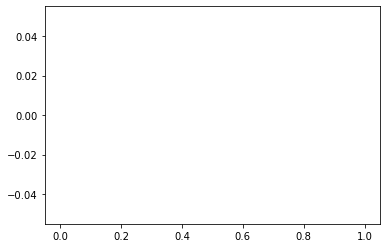

In [24]:
plt.hist(obp_cum_atts_2007_LKOH_08_df.BUYSELLYIELD)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

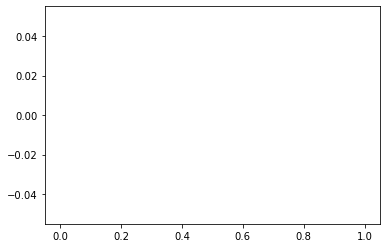

In [25]:
plt.hist(obp_cum_atts_2007_LKOH_08_df.OBPTDVOLRATIO)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

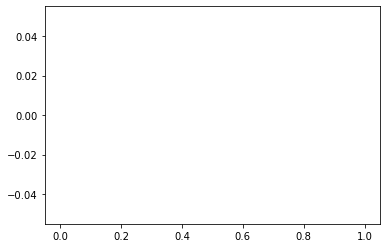

In [26]:
plt.hist(obp_cum_atts_2007_LKOH_08_df.MINMAXRATIO)

In [27]:
obp_cum_atts_2007_LKOH_08_df.sort_values(by='TRADEVOL', ascending=False)

,SECCODE,DATE,OBPLOTNO,TRADEVOL,BUYSELLOBP,TRADESNOTRADES,BUYSELLYIELD,OBPTDVOLRATIO,MINMAXRATIO


In [28]:
obp_cum_atts_2007_df.to_csv('./resources/for_web_app/s1_s2_2007_obp_cum_atts.csv', index=False)

In [29]:
order_atts_cumsums_2007_df

,level_0,level_1,ATT,VAL,DATETIMEMLLS,NO,OBPLOTNO,DATE,SECCODE,SHAREBAL,...,BTVOLobpcs,STVOLobpcs,sobp,bobp,max_sobp_bobp,minus_max_sobp_bobp,stday,btday,max_std_btd,minus_max_std_btd
0,2007-10-01,1,BOVOL,150.0,2007-10-01 10:30:00.000,1,0,2007-10-01,sec1,0,...,0.0,0.0,0.0,-150.0,150.0,-150.0,0.0,-150.0,150.0,-150.0
1,2007-10-01,2,BOVOL,310.0,2007-10-01 10:30:01.000,2,0,2007-10-01,sec1,0,...,0.0,0.0,0.0,-460.0,460.0,-460.0,0.0,-460.0,460.0,-460.0
3,2007-10-01,4,BOVOL,450.0,2007-10-01 10:30:03.000,4,0,2007-10-01,sec1,0,...,0.0,0.0,0.0,-910.0,910.0,-910.0,0.0,-910.0,910.0,-910.0
5,2007-10-01,6,SOVOL,300.0,2007-10-01 10:30:05.000,6,0,2007-10-01,sec1,0,...,0.0,0.0,300.0,-910.0,910.0,-910.0,300.0,-910.0,910.0,-910.0
7,2007-10-01,8,SOVOL,300.0,2007-10-01 10:30:07.500,8,0,2007-10-01,sec1,0,...,0.0,0.0,600.0,-910.0,910.0,-910.0,600.0,-910.0,910.0,-910.0
9,2007-10-01,10,BTVOL,150.0,2007-10-01 10:30:09.250,10,0,2007-10-01,sec1,0,...,150.0,0.0,600.0,-760.0,760.0,-760.0,600.0,-760.0,760.0,-760.0
10,2007-10-01,11,STVOL,150.0,2007-10-01 10:30:09.750,11,0,2007-10-01,sec1,0,...,150.0,150.0,450.0,-760.0,760.0,-760.0,450.0,-760.0,760.0,-760.0
12,2007-10-01,13,BTVOL,150.0,2007-10-01 10:30:11.250,13,0,2007-10-01,sec1,0,...,300.0,150.0,450.0,-610.0,610.0,-610.0,450.0,-610.0,610.0,-610.0
13,2007-10-01,14,STVOL,150.0,2007-10-01 10:30:11.500,14,0,2007-10-01,sec1,0,...,300.0,300.0,300.0,-610.0,610.0,-610.0,300.0,-610.0,610.0,-610.0
16,2007-10-01,17,BTVOL,150.0,2007-10-01 10:30:13.250,17,0,2007-10-01,sec1,0,...,450.0,300.0,300.0,-460.0,460.0,-460.0,300.0,-460.0,460.0,-460.0


In [30]:
order_atts_cumsums_2007_df.drop(['level_0', 'level_1'], axis=1, inplace=True)
order_atts_cumsums_2007_df

,ATT,VAL,DATETIMEMLLS,NO,OBPLOTNO,DATE,SECCODE,SHAREBAL,BPROFIT,SPROFIT,...,BTVOLobpcs,STVOLobpcs,sobp,bobp,max_sobp_bobp,minus_max_sobp_bobp,stday,btday,max_std_btd,minus_max_std_btd
0,BOVOL,150.0,2007-10-01 10:30:00.000,1,0,2007-10-01,sec1,0,0.0,0.0,...,0.0,0.0,0.0,-150.0,150.0,-150.0,0.0,-150.0,150.0,-150.0
1,BOVOL,310.0,2007-10-01 10:30:01.000,2,0,2007-10-01,sec1,0,0.0,0.0,...,0.0,0.0,0.0,-460.0,460.0,-460.0,0.0,-460.0,460.0,-460.0
3,BOVOL,450.0,2007-10-01 10:30:03.000,4,0,2007-10-01,sec1,0,0.0,0.0,...,0.0,0.0,0.0,-910.0,910.0,-910.0,0.0,-910.0,910.0,-910.0
5,SOVOL,300.0,2007-10-01 10:30:05.000,6,0,2007-10-01,sec1,0,0.0,0.0,...,0.0,0.0,300.0,-910.0,910.0,-910.0,300.0,-910.0,910.0,-910.0
7,SOVOL,300.0,2007-10-01 10:30:07.500,8,0,2007-10-01,sec1,0,0.0,0.0,...,0.0,0.0,600.0,-910.0,910.0,-910.0,600.0,-910.0,910.0,-910.0
9,BTVOL,150.0,2007-10-01 10:30:09.250,10,0,2007-10-01,sec1,0,0.0,0.0,...,150.0,0.0,600.0,-760.0,760.0,-760.0,600.0,-760.0,760.0,-760.0
10,STVOL,150.0,2007-10-01 10:30:09.750,11,0,2007-10-01,sec1,0,0.0,0.0,...,150.0,150.0,450.0,-760.0,760.0,-760.0,450.0,-760.0,760.0,-760.0
12,BTVOL,150.0,2007-10-01 10:30:11.250,13,0,2007-10-01,sec1,0,0.0,0.0,...,300.0,150.0,450.0,-610.0,610.0,-610.0,450.0,-610.0,610.0,-610.0
13,STVOL,150.0,2007-10-01 10:30:11.500,14,0,2007-10-01,sec1,0,0.0,0.0,...,300.0,300.0,300.0,-610.0,610.0,-610.0,300.0,-610.0,610.0,-610.0
16,BTVOL,150.0,2007-10-01 10:30:13.250,17,0,2007-10-01,sec1,0,0.0,0.0,...,450.0,300.0,300.0,-460.0,460.0,-460.0,300.0,-460.0,460.0,-460.0


In [31]:
order_atts_cumsums_2007_df.to_csv('./resources/for_web_app/s1_s2_2007_order_atts_cumsums.csv',
                                 index=False)

In [32]:
pd.reset_option('display.max_rows')